In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [2]:
e = eval.evaluation(df_path= '901_aggregated_median.csv')
con = e.norm_agg()
res_enr = e.eval(con, operation = 'enrichment')
res_enr

1280 features were identified


,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.365035,10.167251,1.710947e-273
1,0.990,0.275366,7.405214,3.029734e-318
2,0.985,0.227182,5.990396,5.928788e-323
3,0.980,0.194261,5.222295,0.000000e+00
4,0.975,0.171099,4.684002,0.000000e+00
5,0.970,0.153261,4.238517,4.986602e-316
6,0.965,0.139299,3.887645,1.060986e-303
7,0.960,0.127664,3.627496,8.330758e-295


In [3]:
res_pre = e.eval(con, operation = 'precision_recall')
res_pre

,k,precision,recall
0,5.0,0.094737,0.001993
1,10.0,0.094737,0.004607
2,15.0,0.098246,0.007253
3,20.0,0.081579,0.007690
4,25.0,0.075789,0.008354


In [4]:
hit_ls = e.eval(con, operation = 'hit@k')

running hit@k


In [ ]:
hit_ls

In [ ]:
%matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='trained 817')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()


In [6]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


In [7]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

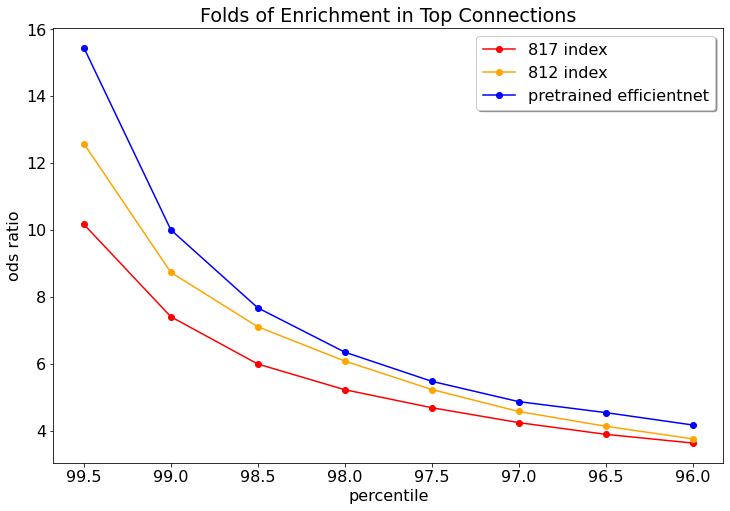

In [8]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="red", label = '817 index')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="orange", label = '812 index')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()